In [85]:
def fibonacci(N):
    a, b = 0,1
    while a < N: 
        yield a
        a, b = b, a + b

In [86]:
list(fibonacci(100))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

In [87]:
%timeit fibonacci(10**4)

222 ns ± 1.66 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [134]:
#Settting up Notebook
#1
import json
import random
from datetime import date, timedelta
import faker

In [135]:
#2
fake = faker.Faker()

In [136]:
#3
usernames = set() 
usernames_no = 1000

   # populate the set with 1000 unique usernames
while len(usernames) < usernames_no:
    usernames.add(fake.user_name())

In [137]:
#4
def get_random_name_and_gender():
    skew = .6 # 60% of users will be female
    male = random.random() > skew
    if male:
        return fake.name_male(), 'M'
    else:
        return fake.name_female(), 'F'
        
def get_users(usernames):
    users = []
    for username in usernames:
        name, gender = get_random_name_and_gender()
        user = {
            'username': username,
            'name': name,
            'gender': gender,
            'email': fake.email(),
            'age': fake.random_int(min=18, max=90), 
            'address': fake.address(),
        }
        users.append(json.dumps(user))
    return users

users = get_users(usernames)
users[:3]

['{"username": "uherrera", "name": "Todd Adams", "gender": "M", "email": "nicole52@yahoo.com", "age": 28, "address": "9075 Andrew Parkway Apt. 988\\nGabrielport, SC 65356"}',
 '{"username": "dawnwhite", "name": "Sabrina Medina", "gender": "F", "email": "sandra59@yahoo.com", "age": 39, "address": "066 Benjamin Glens Apt. 274\\nLake Jennifer, CO 50696"}',
 '{"username": "marylopez", "name": "Neil Davidson", "gender": "M", "email": "alexander61@hotmail.com", "age": 54, "address": "089 Davis Center Apt. 256\\nKennethtown, WA 14092"}']

In [156]:
#5
    #campaign name_format:
    #InternalType_StartDate_EndDate_TargetAge_TargetGender_Currency
def get_type():
    # just some gibberish internal codes 
    types = ['AKX', 'BYU', 'GRZ', 'KTR'] 
    return random.choice(types)

def get_start_end_dates():
    duration = random.randint(1, 2 * 365) 
    offset = random.randint(-365, 365)
    start = date.today() - timedelta(days=offset) 
    end = start + timedelta(days=duration)
    
    def _format_date(date_):
        return date_.strftime("%Y%m%d")
    return _format_date(start), _format_date(end)

def get_age():
    age = random.randint(20, 45)
    age -= age % 5
    diff = random.randint(5, 25)
    diff -= diff %5
    return'{}-{}'.format(age, age + diff)

def get_gender():
    return random.choice(('M', 'F', 'B'))

def get_currency():
    return random.choice(('GBP', 'EUR', 'USD'))

def get_campaign_name():
    separator = '_'
    type_ = get_type()
    start, end = get_start_end_dates() 
    age = get_age()
    gender = get_gender()
    currency = get_currency()
    return separator.join(
           (type_, start, end, age, gender, currency))

In [157]:
#6
# campaign data:
# name, budget, spent, clicks, impressions
def get_campaign_data():
    name = get_campaign_name()
    budget = random.randint(10**3, 10**6)
    spent = random.randint(10**2, budget)
    clicks = int(random.triangular(10**2, 10**5, 0.2 * 10**5))
    impressions = int(random.gauss(0.5 * 10**6, 2))
    return {
        'cmp_name': name,
        'cmp_bgt': budget,
        'cmp_spent': spent,
        
        'cmp_clicks': clicks,
        'cmp_impr': impressions
    }

In [158]:
#7
def get_data(users):
    data = []
    for user in users:
        campaigns = [get_campaign_data()
                     for _ in range(random.randint(2, 8))]
        data.append({'user': user, 'campaigns': campaigns})
    return data

In [159]:
#8
rough_data = get_data(users)
rough_data[:2] # let's take a peek

[{'user': '{"username": "uherrera", "name": "Todd Adams", "gender": "M", "email": "nicole52@yahoo.com", "age": 28, "address": "9075 Andrew Parkway Apt. 988\\nGabrielport, SC 65356"}',
  'campaigns': [{'cmp_name': 'KTR_20211228_20220801_25-50_B_GBP',
    'cmp_bgt': 778424,
    'cmp_spent': 205717,
    'cmp_clicks': 95885,
    'cmp_impr': 500002},
   {'cmp_name': 'GRZ_20210615_20220512_35-45_M_USD',
    'cmp_bgt': 876608,
    'cmp_spent': 768029,
    'cmp_clicks': 54378,
    'cmp_impr': 500002},
   {'cmp_name': 'KTR_20210725_20230618_40-45_F_EUR',
    'cmp_bgt': 283424,
    'cmp_spent': 190176,
    'cmp_clicks': 15281,
    'cmp_impr': 499998},
   {'cmp_name': 'KTR_20210523_20220115_30-40_M_GBP',
    'cmp_bgt': 823134,
    'cmp_spent': 131791,
    'cmp_clicks': 21561,
    'cmp_impr': 499998},
   {'cmp_name': 'KTR_20211107_20220831_40-50_M_GBP',
    'cmp_bgt': 183794,
    'cmp_spent': 115691,
    'cmp_clicks': 15634,
    'cmp_impr': 500000},
   {'cmp_name': 'KTR_20210223_20230204_35-55_B_E

In [160]:
#9 
data = []
for datum in rough_data:
    for campaign in datum['campaigns']:
        campaign.update({'user': datum['user']})
        data.append(campaign)
data[:2] #let's take another peek

[{'cmp_name': 'KTR_20211228_20220801_25-50_B_GBP',
  'cmp_bgt': 778424,
  'cmp_spent': 205717,
  'cmp_clicks': 95885,
  'cmp_impr': 500002,
  'user': '{"username": "uherrera", "name": "Todd Adams", "gender": "M", "email": "nicole52@yahoo.com", "age": 28, "address": "9075 Andrew Parkway Apt. 988\\nGabrielport, SC 65356"}'},
 {'cmp_name': 'GRZ_20210615_20220512_35-45_M_USD',
  'cmp_bgt': 876608,
  'cmp_spent': 768029,
  'cmp_clicks': 54378,
  'cmp_impr': 500002,
  'user': '{"username": "uherrera", "name": "Todd Adams", "gender": "M", "email": "nicole52@yahoo.com", "age": 28, "address": "9075 Andrew Parkway Apt. 988\\nGabrielport, SC 65356"}'}]

In [161]:
#10
with open('data.json', 'w') as stream:
    stream.write(json.dumps(data))

In [162]:
# Creating thr DataFrame
#1
import json
import calendar
import numpy as np
from pandas import DataFrame
import arrow
import pandas as pd

In [148]:
#2
with open('data.json') as stream:
    data = json.loads(stream.read())

In [163]:
#3
df = DataFrame(data)
df.head()

,cmp_name,cmp_bgt,cmp_spent,cmp_clicks,cmp_impr,user
0,KTR_20211228_20220801_25-50_B_GBP,778424,205717,95885,500002,"{""username"": ""uherrera"", ""name"": ""Todd Adams"",..."
1,GRZ_20210615_20220512_35-45_M_USD,876608,768029,54378,500002,"{""username"": ""uherrera"", ""name"": ""Todd Adams"",..."
2,KTR_20210725_20230618_40-45_F_EUR,283424,190176,15281,499998,"{""username"": ""uherrera"", ""name"": ""Todd Adams"",..."
3,KTR_20210523_20220115_30-40_M_GBP,823134,131791,21561,499998,"{""username"": ""uherrera"", ""name"": ""Todd Adams"",..."
4,KTR_20211107_20220831_40-50_M_GBP,183794,115691,15634,500000,"{""username"": ""uherrera"", ""name"": ""Todd Adams"",..."


In [164]:
#4
df.count()

cmp_name      4959
cmp_bgt       4959
cmp_spent     4959
cmp_clicks    4959
cmp_impr      4959
user          4959
dtype: int64

In [165]:
#5 
df.describe()

,cmp_bgt,cmp_spent,cmp_clicks,cmp_impr
count,4959.000000,4959.000000,4959.000000,4959.000000
mean,510193.474088,255189.932244,39877.477112,499999.504134
std,288580.631522,222071.168090,21589.993473,2.033883
min,1291.000000,116.000000,423.000000,499991.000000
25%,257753.500000,73032.500000,22576.000000,499998.000000
50%,515731.000000,191997.000000,36580.000000,500000.000000
75%,756464.000000,390146.000000,54927.000000,500001.000000
max,999706.000000,982206.000000,99410.000000,500008.000000


In [166]:
#6 
df.sort_values(by=['cmp_bgt'], ascending=False).head(3)

,cmp_name,cmp_bgt,cmp_spent,cmp_clicks,cmp_impr,user
633,GRZ_20221112_20230313_30-35_M_USD,999706,912895,65545,499998,"{""username"": ""bethany09"", ""name"": ""William Adk..."
1766,AKX_20201219_20221111_35-45_M_EUR,999638,977902,18454,500000,"{""username"": ""hannah82"", ""name"": ""Kimberly Dua..."
3315,BYU_20210404_20220213_35-45_B_EUR,999362,188141,89999,500000,"{""username"": ""smithalex"", ""name"": ""Adam Luna"",..."


In [167]:
#7
df.sort_values(by=['cmp_bgt'], ascending=False).tail(3)

,cmp_name,cmp_bgt,cmp_spent,cmp_clicks,cmp_impr,user
4371,AKX_20210704_20220512_45-60_F_USD,1862,785,91317,499998,"{""username"": ""timothy60"", ""name"": ""Debra Rodri..."
2323,KTR_20220604_20231106_25-45_M_GBP,1634,853,50498,500000,"{""username"": ""erin17"", ""name"": ""Kathryn Stein""..."
3697,GRZ_20210925_20220708_25-35_M_GBP,1291,629,46691,499999,"{""username"": ""dannyjohnson"", ""name"": ""Mary Ram..."


In [168]:
#8
def unpack_campaign_name(name):
    # very optimistic method, assumes data in campaign name
    # is always in good state
    type_, start, end, age, gender, currency = name.split('_')
    start = arrow.get(start, 'YYYYMMDD').date()
    end = arrow.get(end, 'YYYYMMDD').date()
    return type_, start, end, age, gender, currency

campaign_data = df['cmp_name'].apply(unpack_campaign_name)
campaign_cols = [
    'Type', 'Start', 'End', 'Age', 'Gender', 'Currency']
campaign_df = DataFrame (
    campaign_data.tolist(), columns=campaign_cols, index=df.index)
campaign_df.head(3)

,Type,Start,End,Age,Gender,Currency
0,KTR,2021-12-28,2022-08-01,25-50,B,GBP
1,GRZ,2021-06-15,2022-05-12,35-45,M,USD
2,KTR,2021-07-25,2023-06-18,40-45,F,EUR


In [169]:
#9 
df = df.join(campaign_df)

In [170]:
#10
df[['cmp_name'] + campaign_cols].head(3)

,cmp_name,Type,Start,End,Age,Gender,Currency
0,KTR_20211228_20220801_25-50_B_GBP,KTR,2021-12-28,2022-08-01,25-50,B,GBP
1,GRZ_20210615_20220512_35-45_M_USD,GRZ,2021-06-15,2022-05-12,35-45,M,USD
2,KTR_20210725_20230618_40-45_F_EUR,KTR,2021-07-25,2023-06-18,40-45,F,EUR


In [171]:
#11
def unpack_user_json(user):
    # very optimistic as well, expects user objects
    # to have all attributes
    user = json.loads(user.strip())
    return[
        user['username'],
        user['email'],
        user['name'],
        user['gender'],
        user['age'],
        user['address'],
    ]
user_data = df['user'].apply(unpack_user_json)
user_cols = [
    'username', 'email', 'name', 'gender', 'age', 'address']
user_df = DataFrame (
    user_data.tolist(), columns=user_cols, index=df.index)

In [172]:
#12
df = df.join(user_df)
#13
df[['user'] + user_cols].head(2)

,user,username,email,name,gender,age,address
0,"{""username"": ""uherrera"", ""name"": ""Todd Adams"",...",uherrera,nicole52@yahoo.com,Todd Adams,M,28,"9075 Andrew Parkway Apt. 988\nGabrielport, SC ..."
1,"{""username"": ""uherrera"", ""name"": ""Todd Adams"",...",uherrera,nicole52@yahoo.com,Todd Adams,M,28,"9075 Andrew Parkway Apt. 988\nGabrielport, SC ..."


In [173]:
#14
better_columns = [
    'Budget', 'Clicks', 'Impressions',
    'cmp_name', 'Spent', 'user',
    
    'Type', 'Start', 'End',
    'Target Age', 'Target Gender', 'Currency',
    'Username', 'Email', 'Name',
    'Gender', 'Age', 'Address',
]
df.columns = better_columns

In [174]:
#15
def calculate_extra_columns(df):
    # Click Through Rate
    df['CTR'] = df['Clicks'] / df['Impressions']
    # Cost Per Click
    df['CPC'] = df['Spent'] / df['Clicks']
    # Cost Per Impression
    df['CPI'] = df['Spent'] / df['Impressions']
calculate_extra_columns(df)

In [175]:
#16
df[['Spent', 'Clicks', 'Impressions',
    'CTR', 'CPC', 'CPI']].head(3)

,Spent,Clicks,Impressions,CTR,CPC,CPI
0,500002,778424,205717,3.783956,0.642326,2.430533
1,500002,876608,768029,1.141374,0.570383,0.651020
2,499998,283424,190176,1.490325,1.764134,2.629133


In [176]:
#17
clicks = df['Clicks'][0]
impressions = df['Impressions'][0]
spent = df['Spent'][0]
CTR = df['CTR'][0]
CPC = df['CPC'][0]
CPI = df['CPI'][0]
print('CTR:', CTR, clicks / impressions) 
print('CPC:', CPC, spent / clicks) 
print('CPI:', CPI, spent / impressions)

CTR: 3.7839556283632367 3.7839556283632367
CPC: 0.6423260331130592 0.6423260331130592
CPI: 2.4305332082423914 2.4305332082423914


In [177]:
#18
def get_day_of_the_week(day):
    number_to_day = dict(enumerate(calendar.day_name, 1))
    return number_to_day[day.isoweekday()]

def get_duration(row):
    return (row['End'] - row['Start']).days

df['Day of Week'] = df['Start'].apply(get_day_of_the_week) 
df['Duration'] = df.apply(get_duration, axis=1)

In [178]:
#19 
df[['Start', 'End', 'Duration', 'Day of Week']].head(3)

,Start,End,Duration,Day of Week
0,2021-12-28,2022-08-01,216,Tuesday
1,2021-06-15,2022-05-12,331,Tuesday
2,2021-07-25,2023-06-18,693,Sunday


In [179]:
# Cleaning Everything
#20
final_columns = [
    'Type', 'Start', 'End', 'Duration', 'Day of Week', 'Budget',
    'Currency', 'Clicks', 'Impressions', 'Spent', 'CTR', 'CPC',
    'CPI', 'Target Age', 'Target Gender', 'Username', 'Email',
    'Name', 'Gender', 'Age'
]
df = df[final_columns]

In [180]:
#Saving the dataFrame to a File
#21
df.to_csv('df.csv')

In [181]:
#22
df.to_json('df.json')

In [182]:
#23
df.to_excel('df.xls')

/Users/danielcoelho/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  


In [183]:
#24
%matplotlib inline

In [184]:
#25
import matplotlib.pyplot as plt
plt.style.use(['classic', 'ggplot'])
import pylab
pylab.rcParams.update({'font.family' : 'serif'})

In [185]:
#26 
df.describe()

,Duration,Clicks,Impressions,Spent,CTR,CPC,CPI,Age
count,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000
mean,367.182698,510193.474088,255189.932244,499999.504134,7.694148,3.294352,20.239013,54.623109
std,212.028724,288580.631522,222071.168090,2.033883,51.353990,14.009009,151.956697,21.176674
min,1.000000,1291.000000,116.000000,499991.000000,1.000164,0.500145,0.509058,18.000000
25%,184.000000,257753.500000,73032.500000,499998.000000,1.337660,0.660970,1.281575,37.000000
50%,368.000000,515731.000000,191997.000000,500000.000000,1.974557,0.969500,2.604197,56.000000
75%,550.000000,756464.000000,390146.000000,500001.000000,4.003958,1.939844,6.846254,73.000000
max,730.000000,999706.000000,982206.000000,500008.000000,1915.530303,387.295895,4310.362069,90.000000


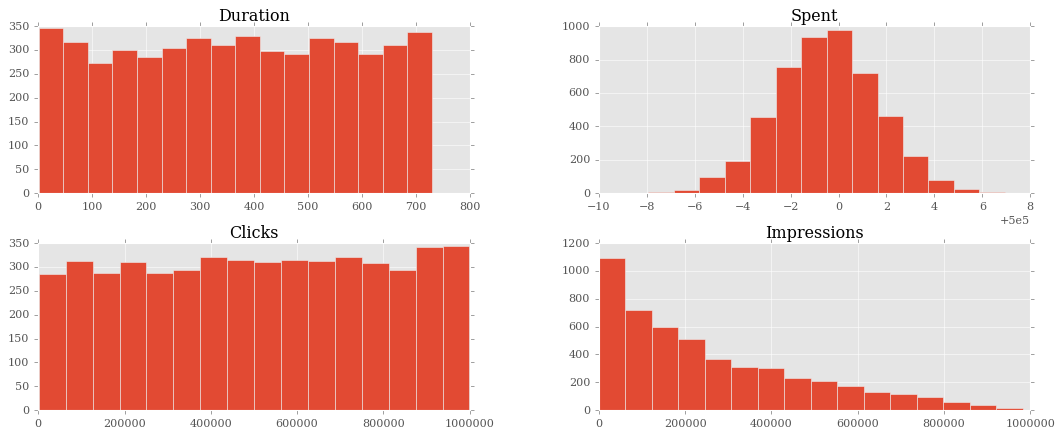

In [204]:
#27
df[['Duration', 'Spent', 'Clicks', 'Impressions']].hist(bins=16, figsize=(16, 6));

array([[<AxesSubplot:title={'center':'CTR'}>,
        <AxesSubplot:title={'center':'CPC'}>],
       [<AxesSubplot:title={'center':'CPI'}>, <AxesSubplot:>]],
      dtype=object)

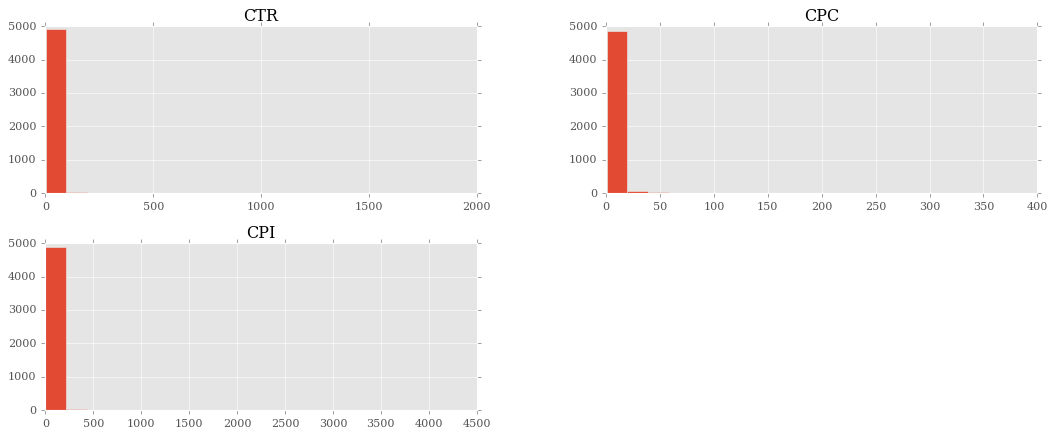

In [187]:
#28
df[['CTR', 'CPC', 'CPI']].hist(
    bins=20, figsize=(16, 6))

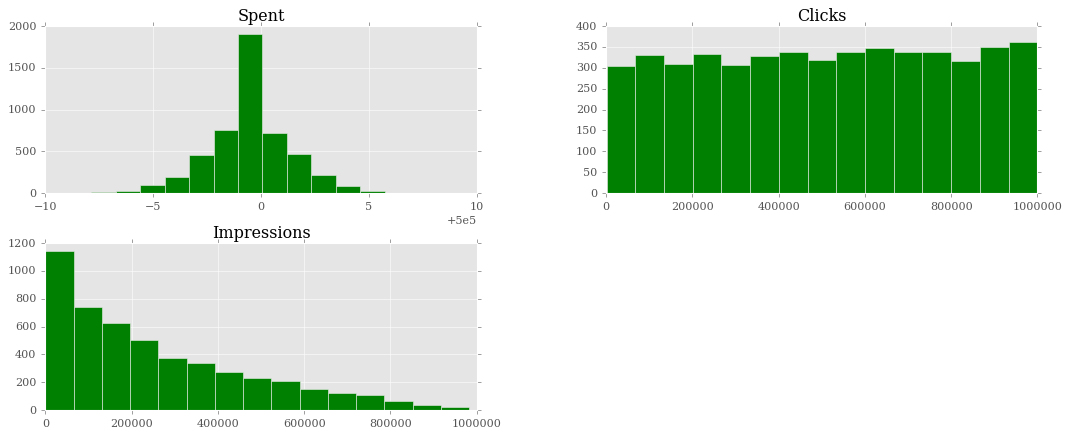

In [203]:
#29
mask = df.Spent
df[['Budget', 'Spent', 'Clicks', 'Impressions']].hist (
    bins=15, figsize=(16, 6), color='g');


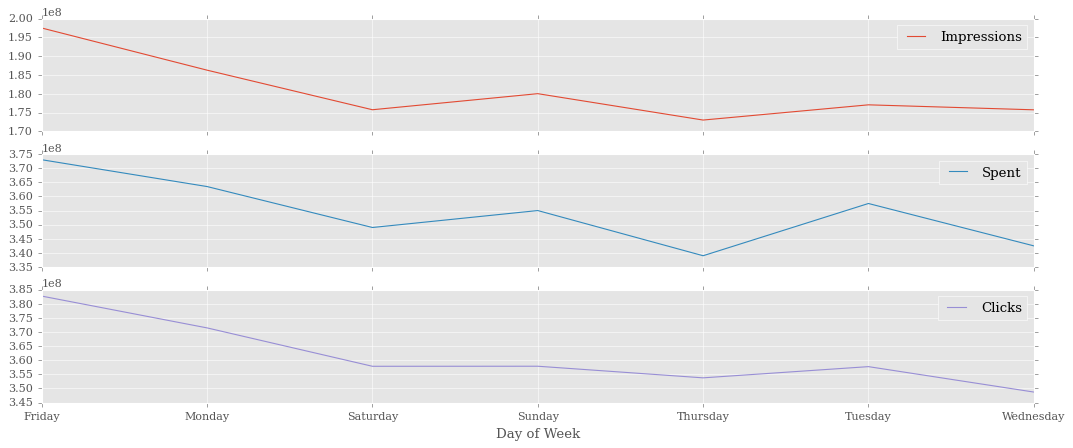

In [189]:
#30
df_weekday = df.groupby(['Day of Week']).sum()
df_weekday[['Impressions', 'Spent', 'Clicks']].plot(
    figsize=(16, 6), subplots=True);

In [190]:
#31
agg_config = {
    'Impressions': ['mean', 'std'],
    'Spent': ['mean', 'std'],
}
df.groupby(['Target Gender', 'Target Age']).agg(agg_config)

Impressions                         Spent  \
                                   mean            std           mean   
Target Gender Target Age                                                
B             20-25       239278.485714  223854.151114  499999.585714   
              20-30       251702.569444  225614.909675  499999.777778   
              20-35       272520.521739  234269.225158  500000.014493   
              20-40       233857.705882  191480.272892  499999.279412   
              20-45       246122.470588  229946.408705  499998.941176   
...                                 ...            ...            ...   
M             45-50       173000.642857  176065.806918  499999.142857   
              45-55       221730.500000  209949.001073  499999.750000   
              45-60       328146.416667  229277.133639  499998.833333   
              45-65       218587.090909  237022.748668  500000.000000   
              45-70       262820.000000  258050.203094  499997.333333   

                                    
                               std  
Target Gender Target Age            
B             20-25       1.884282  
              20-30       2.290349  
              20-35       1.974043  
              20-40       1.875574  
              20-45       2.045440  
...                            ...  
M             45-50       1.350621  
              45-55       2.489980  
              45-60       2.208798  
              45-65       1.949359  
              45-70       2.081666  

[90 rows x 4 columns]

In [191]:
#32
pivot = df.pivot_table (
    values=['Impressions', 'Clicks', 'Spent'],
    index=['Target Age'],
    columns=['Target Gender'],
    aggfunc=np.sum
)
pivot

Clicks                     Impressions                      \
Target Gender         B         F         M           B         F         M   
Target Age                                                                    
20-25          31073613  37698198  48722460    16749494  20506467  26612071   
20-30          36869569  45708388  43201699    18122585  26092382  22332007   
20-35          37202086  40341439  37383396    18803916  17358185  17208821   
20-40          32590688  36294418  38522907    15902324  18491700  21881796   
20-45           8318194   6084596   5597592     4184082   3277215   1798599   
25-30          35251474  46995138  39005446    17291297  22991067  16397171   
25-35          40886355  37338794  38050243    19092313  16755047  17303383   
25-40          39233048  34810386  39794575    20216544  16123041  17139976   
25-45          38354431  36728790  37267517    19514578  19121824  16609884   
25-50           5852712   4982720   6848462     2032248   2131361   4046758   
30-35          38255302  36341822  35977345    21595450  16833463  18110606   
30-40          39982265  47322836  42012132    18843449  24347290  23330672   
30-45          35101336  40231299  43268108    14796383  20830164  23057964   
30-50          34588759  37060614  42673849    18296348  19710712  23691800   
30-55           9166253   8311951  10147992     4108364   4743268   5710550   
35-40          34897405  40411818  47285554    15104257  20111620  23513226   
35-45          33684195  40681786  34585780    15734967  20725347  18243798   
35-50          40788296  37732067  41214387    23491882  19504251  18081730   
35-55          36347683  42852704  38157690    19482152  19450356  18984980   
35-60           6880556   6550579   6919498     3189475   3774509   3254996   
40-45          37931372  34247025  37174228    20266869  17926513  18872145   
40-50          37814075  37004760  33959204    17713330  18907555  16881349   
40-55          41097245  39434013  37691090    20249529  22189814  17632203   
40-60          46449434  42055608  29655016    25272636  21177330  13247497   
40-65           7431968  10455553   6006742     3759121   5175571   3485899   
45-50           8375284   7879004   6279383     5296823   4065848   2422009   
45-55           9370471   6072912   7944901     4007931   2775312   3547688   
45-60           6151882  10639541   7056506     2686300   5463900   3937757   
45-65           3883784   8144311   5592497     2227084   3347073   2404458   
45-70           2971252   2875777   1963405     1273241   1743464    788460   

                  Spent                      
Target Gender         B         F         M  
Target Age                                   
20-25          34999971  36499959  44499938  
20-30          35999984  38999948  41999993  
20-35          34500001  35999968  33500003  
20-40          33999951  42499954  35999957  
20-45           8499982   5999988   5000004  
25-30          34999972  42999956  39499978  
25-35          35999966  39999977  37999935  
25-40          39999968  35499988  41499946  
25-45          37999972  39499960  38999941  
25-50           7499980   6499985   6999990  
30-35          37999949  36499973  35499943  
30-40          39999972  42499949  44999953  
30-45          34499964  37999963  41499940  
30-50          36999961  34999944  38999998  
30-55           7999989   7000001   7999992  
35-40          36999927  36499969  43999970  
35-45          33499981  36999956  34499953  
35-50          37999927  37499967  38000002  
35-55          33999964  42499966  39499935  
35-60           6499989   8500002   5499990  
40-45          37999944  33999981  38999958  
40-50          36999966  36499971  32999966  
40-55          36999974  38999938  38499963  
40-60          42499941  39999978  30999950  
40-65           6999997  11499995   6000001  
45-50           9500005   5499993   6999988  
45-55           9499981   7500008   7999996  
45-60           8000007  1099